### Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

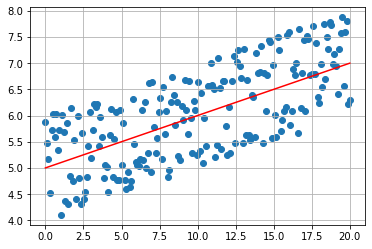

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x = np.linspace(0, 20, 200)
y = 5 + 0.1*x + (2*np.random.rand(200)-1)
plt.figure()
plt.scatter(x, y)
plt.plot(x, 5 + 0.1*x, "r")
plt.grid()


In [6]:
import scipy.optimize as opt

In [56]:
def funcion_de_costo(beta, X, y) :
    beta = np.reshape(beta, [2,-1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [57]:
# y_pred = b0 + b1*x
beta_inicial = np.random.rand(2)
beta_inicial = np.reshape(beta_inicial, [2, -1])

n = len(y)
y = np.reshape(y, [n, -1])

x = np.reshape(x, [n, -1])
ones = np.ones([n, 1])
X = np.hstack((ones, x))


In [58]:
funcion_de_costo(beta_inicial, X, y)

11.76998576215697

In [59]:
sol = opt.minimize(funcion_de_costo,
                  beta_inicial,
                  args=(X,y))
sol


      fun: 4.4162815925122076e-12
 hess_inv: array([[ 0.11906907, -0.01926868],
       [-0.01926868,  0.00318508]])
      jac: array([-3.49527121e-06,  1.98896573e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 120
      nit: 2
     njev: 36
   status: 2
  success: False
        x: array([9.92465646e-07, 9.99999833e-01])

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

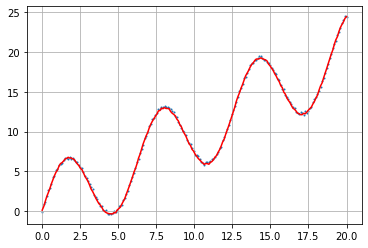

In [13]:
import numpy as np 

m = 200
x = np.linspace(0, 20, m)

y_con_ruido = 5*np.sin(x) + x + (np.random.rand(m)*0.4 - 0.1)

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.figure()
plt.scatter(x,y_con_ruido, s=1)
plt.plot(x, y,"r")
plt.grid()
# factores son las columnas en la parte de matrices

In [ ]:
# Definimos un modelo f(x) = b0 + b1*x + b2*sin(x)

In [33]:
def funcion_de_costo(beta, X, y) :
    beta = np.reshape(beta, [3, -1]) #porque para este caso beta es un vector vertical con 4 elementos 
    pred = X @ beta
    costo = (y-pred).T @ (y-pred) 
    return costo[0][0]
    

In [34]:
# Construyendo matriz x
#ones = np.ones([m, 1]) # m renglones y una columna de unos
#x_1 = np.reshape(x, [m, -1]) # columna de factor x con m renglones y 1 columna 
#x_2 = np.reshape(x**2, [m, -1])# columna de actor x^2
#x_3 = np.reshape(x**3, [m,-1]) #columna de factor x^3

#X = np.hstack( (ones, x_1, x_2, x_3) )


In [42]:
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1]) # columna de factor x con m renglones y 1 columna 
x_sin = np.reshape(np.sin(x), [m, -1])# columna de actor x^2

X = np.hstack( (ones, x_1, x_sin) )





In [43]:
beta_inicial = np.random.rand(3) # vector aleatorio de 4 porque beta tiene 4 elementos
y = np.reshape(y, [m, -1])

In [44]:
funcion_de_costo(beta_inicial, X, y)

24484.41178809474

In [45]:
import scipy.optimize as opt 
sol = opt.minimize(funcion_de_costo,
                  beta_inicial, 
                  args =(X,y))
sol

      fun: 0.6665336822464987
 hess_inv: array([[ 1.01772053e-02, -7.64079892e-04, -1.14826565e-03],
       [-7.64079892e-04,  7.60965567e-05,  9.82265500e-05],
       [-1.14826565e-03,  9.82265500e-05,  5.23569028e-03]])
      jac: array([-1.93715096e-07, -2.14576721e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-1.81843400e-03,  1.00021045e+00,  4.99440334e+00])

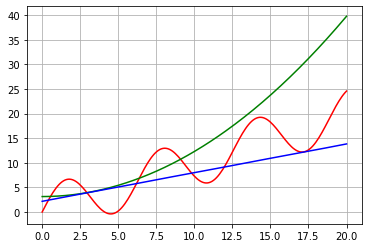

In [47]:
y_real = 5 * np.sin(x) + x
y_pred1 = 3.15885246e+00 -1.91233076e-02 + 9.15653878e-02*x**2 - 2.51156750e-03
y_pred2 = 2.16932046 + 0.58214334*x + 0.01621837*np.sin(x)

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.figure()
plt.plot(x, y_real,"r")
plt.plot(x, y_pred1, "g")
plt.plot(x, y_pred2, "b")
plt.grid()


## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.